In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

df=pd.read_csv('/content/College_dataset.csv')
print(df)

   GPA  Extracurricular  Parental_Income  Study_Hours  Entrance_Score  \
0  8.5                3            50000           15              80   
1  7.2                2            40000           10              70   
2  9.0                4            70000           20              90   
3  6.5                1            35000            8              60   
4  7.8                2            45000           12              75   
5  8.1                3            60000           17              85   
6  6.9                2            39000            9              65   
7  7.5                2            47000           11              72   
8  8.7                4            75000           22              95   
9  7.0                1            36000            7              58   

   Distance Internet  Final_Score  
0         5      Yes           85  
1        15       No           75  
2         3      Yes           95  
3        20       No           65  
4        10     

In [2]:
df.describe()

,GPA,Extracurricular,Parental_Income,Study_Hours,Entrance_Score,Distance,Final_Score
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000
mean,7.72000,2.400000,49700.000000,13.100000,75.000000,11.100000,79.30000
std,0.84037,1.074968,14142.528455,5.173651,12.463279,7.445356,12.11106
min,6.50000,1.000000,35000.000000,7.000000,58.000000,2.000000,62.00000
25%,7.05000,2.000000,39250.000000,9.250000,66.250000,4.250000,69.75000
50%,7.65000,2.000000,46000.000000,11.500000,73.500000,11.000000,79.00000
75%,8.40000,3.000000,57500.000000,16.500000,83.750000,17.250000,87.25000
max,9.00000,4.000000,75000.000000,22.000000,95.000000,22.000000,97.00000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GPA              10 non-null     float64
 1   Extracurricular  10 non-null     int64  
 2   Parental_Income  10 non-null     int64  
 3   Study_Hours      10 non-null     int64  
 4   Entrance_Score   10 non-null     int64  
 5   Distance         10 non-null     int64  
 6   Internet         10 non-null     object 
 7   Final_Score      10 non-null     int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 772.0+ bytes


In [4]:
df.isnull().sum()

,0
GPA,0
Extracurricular,0
Parental_Income,0
Study_Hours,0
Entrance_Score,0
Distance,0
Internet,0
Final_Score,0


In [5]:
df['Final_Score'].unique()

array([85, 75, 95, 65, 80, 88, 68, 78, 97, 62])

In [6]:
#convert yes/no into 1/0

df['Internet']=df['Internet'].map({'Yes':1 , 'No':0})
print(df)

   GPA  Extracurricular  Parental_Income  Study_Hours  Entrance_Score  \
0  8.5                3            50000           15              80   
1  7.2                2            40000           10              70   
2  9.0                4            70000           20              90   
3  6.5                1            35000            8              60   
4  7.8                2            45000           12              75   
5  8.1                3            60000           17              85   
6  6.9                2            39000            9              65   
7  7.5                2            47000           11              72   
8  8.7                4            75000           22              95   
9  7.0                1            36000            7              58   

   Distance  Internet  Final_Score  
0         5         1           85  
1        15         0           75  
2         3         1           95  
3        20         0           65  
4        10

In [ ]:
df = pd.DataFrame(df)

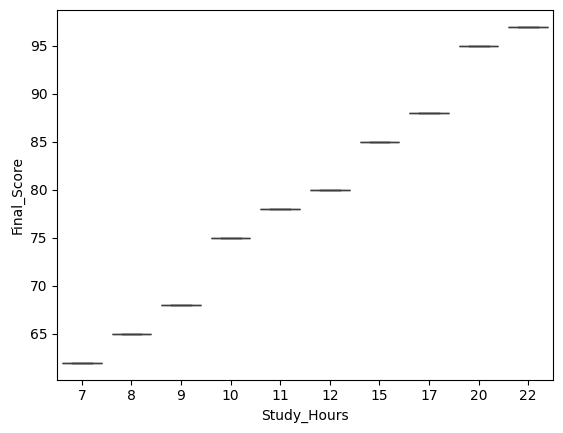

In [7]:
sns.boxplot(x='Study_Hours', y='Final_Score', data=df)
plt.show()

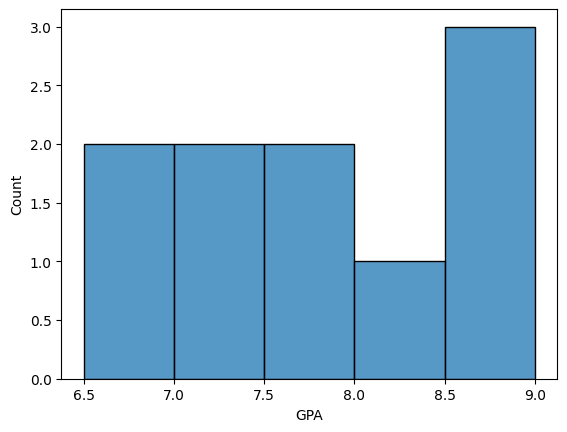

In [8]:
sns.histplot(data=df, x='GPA')
plt.show()

In [9]:
#split into input and output

X=df[['GPA','Study_Hours']]
Y=df['Final_Score']

In [10]:
#Split into training and testing data

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [11]:
#built the model and train
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [12]:
#predict using test data

Final_Score=model.predict(X_test)

In [14]:
comparison = pd.DataFrame({
    'Actual Score': Y_test.values,
    'Predicted Score': Final_Score.round(2)
})

pd.set_option('display.max_rows', None)

print(comparison)

   Actual Score  Predicted Score
0            97            99.57
1            75            71.52
